In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings

In [119]:
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [120]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')

### Проведем EDA каждой таблицы

In [121]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [122]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [123]:
customers.shape

(99441, 5)

In [124]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [125]:
customers.customer_unique_id.nunique()

96096

In [126]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [127]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [128]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [129]:
orders[['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date', 
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date', 
        'order_estimated_delivery_date']].apply(pd.to_datetime)

In [130]:
orders.order_id.nunique()

99441

In [131]:
orders.customer_id.nunique()

99441

### Из за того что уникальных order_id и уникальных customer_id одинаковое количество, предполагаю что новый castomer_id создается с каждым новым заказом
### Для ответа на большинство вопросов нам пригодиться customer_unique_id, поэтому добавлю его в датасэт с заказами. 



In [132]:
customers_id = customers[['customer_id','customer_unique_id']]

In [133]:
customers_id.head(2)

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3


In [134]:
orders_data = orders.merge(customers_id, on = 'customer_id', how = 'left')

orders_data = orders_data.reindex(columns=['customer_unique_id'\
                                           ,'order_id'\
                                           ,'customer_id'\
                                            ,'order_status'\
                                           ,'order_purchase_timestamp'\
                                           ,'order_approved_at'\
                                           ,'order_delivered_carrier_date'\
                                           ,'order_delivered_customer_date'\
                                           ,'order_estimated_delivery_date'])

## Готовая к работе таблица с заказами и клиентами:

In [136]:
orders_data.head(3)

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


## Посмотрим на таблицу items

In [137]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [138]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Для задания нам нужны будут только order_id, product_id, price

In [139]:
items = items[['order_id','product_id','price']]

#### Займемся ответами на вопросы.

## 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

#### под ПОКУПКОЙ я понимаю именно заказ, а не покупку конкретного товара


In [140]:
orders_data.head()

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Совершенной покупкой буду считать завершенную или в перспективе завершенную покупку. Изучим статусы заказов:

In [141]:
orders_data.order_status.value_counts(normalize = True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

### Не буду брать в рассчет заказы cadceled. Посмотрю поближе на заказы unavailable, сравню их с зaказами delivered,
### что бы понять что знасчит статус unavailable

In [142]:
orders_data.query('order_status == "unavailable"').head(4)

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,41fc647b8c6bd979b1b6364b60471b50,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,0e634b16e4c585acbd7b2e8276ce6677,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,596ed6d7a35890b3fbac54ec01f69685,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,2349bbb558908e0955e98d47dacb7adb,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06


In [143]:
orders_data.query('order_status == "delivered"').head(4)

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15


### Так как unavailable заказы не уходят на отгрузку, считаю их равноценными canceled. Возможно они просто не были оплачены. 
### Так же все другие статусы (shiped, invoiced), кроме delivered не имеют даты получения заказа клиетом, считаю их потенциально 
### отмененными на том или ином моменте, или не доставленными по какой либо причине. 

### Считаю что для этой метрики
### можно использовать только заказы со статусом delivered

### Считаю количество уникальных order_id по каждому customer_unique_id, отфильтрую по клиентам с одним заказом и посмотрю на размер датасета

In [188]:
one_order_customers = orders_data.query('order_status == "delivered"')\
                                .groupby('customer_unique_id',as_index = False)['order_id'].nunique()\
                                .query('order_id == 1').shape[0]

In [187]:

print('Пользователей совершивших покупку только один раз: ' + str(one_order_customers))

Пользователей совершивших покупку только один раз: 90557


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

#### Для подсчета буду ореинтироваться на месяц даты создания заказов. Cоздам колонку с месяцами, агрегирю заказы по месяцам, посчитаю статусы

In [189]:
orders_data['order_month'] = orders_data.order_purchase_timestamp.dt.to_period('M')

orders_data_no_delivered = orders_data.query('order_status != "delivered"').sort_values('order_month')

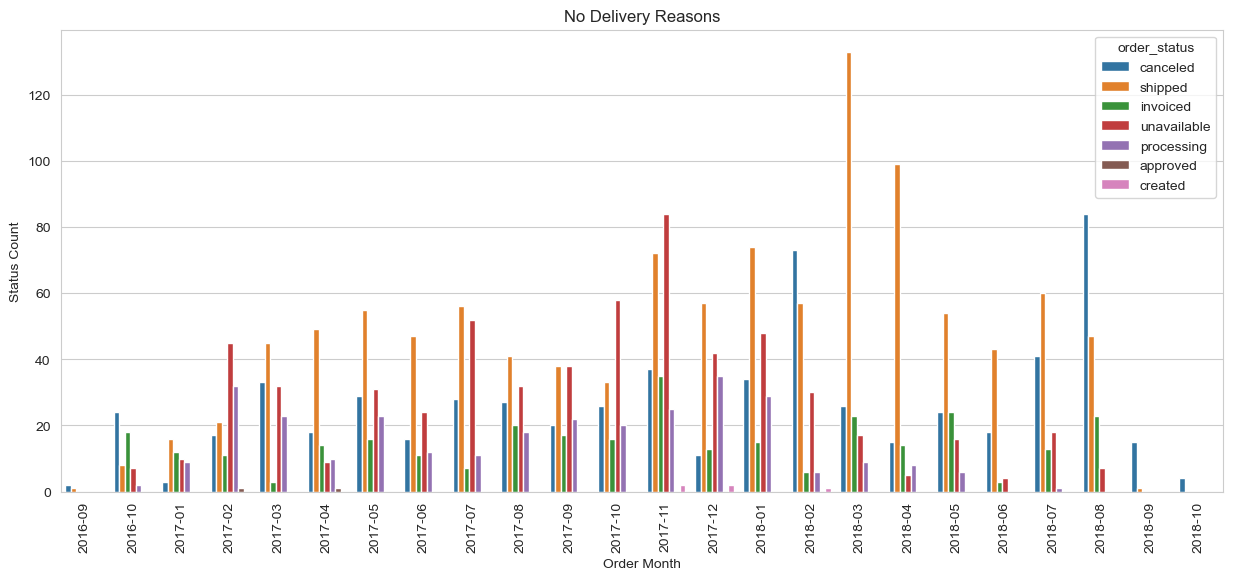

In [148]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

plot = sns.countplot(
    data=orders_data_no_delivered, 
    x='order_month', 
    hue='order_status'
)

plt.xticks(rotation=90)

plt.title('No Delivery Reasons')
plt.xlabel('Order Month')
plt.ylabel('Status Count')

plt.show() 


### Из этого графика видим что заказы могут быть не доставлены и иметь совершенно разные статусы, даже уже отправленные когда то могут быть не доставленны.
### В тоже время статус delivered присваевается только когда заказы действительно доставлены. 
### Так же дата доставки выставляется только на заказы в статусе delivered. 
### Сответственно заказы в любых других статусах действительно не были доставленны. 

In [149]:
canceletion_reasons = orders_data_no_delivered.groupby('order_month',as_index = False)['order_status'].value_counts()\
                                .pivot(index = 'order_month',columns ='order_status', values = 'count')\
                                .mean()\
                                .reset_index()\
                                .rename(columns = {0:'month_mean'})\
                                .sort_values('month_mean', ascending = False)
    

[Text(0.5, 0, 'Количество'), Text(0, 0.5, 'Сатус')]

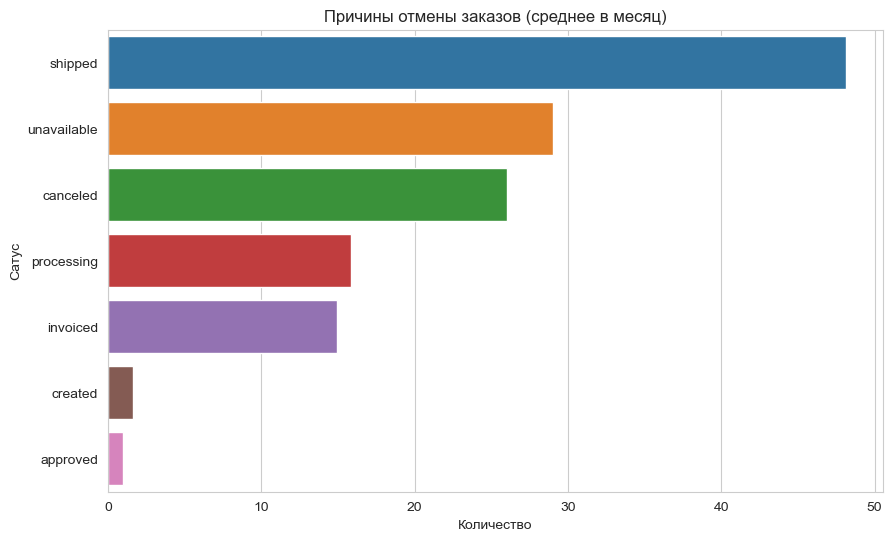

In [207]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
g = sns.barplot(data = canceletion_reasons, x = 'month_mean', y = 'order_status')
g.set_title('Причины отмены заказов (среднее в месяц)')
g.set(xlabel = 'Количество', ylabel = 'Сатус')

#### В целом большинство причин я бы отнес к отмене или не оплате заказа:
#### -approved
#### -canceled
#### -created
#### -invoiced
#### -processing.
#### Какие то заказы действительно зависают на статусе "SHIPPED", по ним есть дата отправки, но нет даты доставки, не только недавно созданные
#### Предполагаю что они так же могли быть отменены в момент достаки, возможно в связи с превышением сроков.
##### Либо по какой то причине пересозданны и доставленны под новым номером. ЛИБО ДОСТАВЛЕННЫ, НО НЕ ПРОГРУЗИЛСЯ НУЖНЫЙ СТАТУС И ДАТА ДОСТАВКИ

#### Так же интересно то что в последнии 2 месяца практически пропали все статусы кроме canceled, возможно это 
#### связано с отладкой, изменением бизнес прцессов, исправлением ошибки непроставления статусов.

#### Так же, то что в последние 2 месяца у нас нет статусов
#### shipped говорит о том что мы смотрим

#### на ретроспективные данные. Если бы мы смотрели на только что отгруженные данные в ноябре 2018 года, то у нас должно
#### было бы быть очень много заказов находящихся в процессе доставки
### Вывод: невозможно определить истинные причины отмены, так как у нас закралась явная ошибка при сборе данных, проставлении статусов


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

#### Смержим таблицу с товарами и заказами для этой метрики, из таблицы с заказами нам нужны даты покупок. 
#### Так же будем использовать только заказы delivered

In [190]:
orders_date = orders_data.query('order_status == "delivered"')[['order_purchase_timestamp', 'order_id']]

items_on_date = items.merge(orders_date, on = 'order_id', how = 'left')

#### Убираю дубликаты заказ-продукт что бы не учитывать количество товара в одном заказе

In [191]:
items_on_date.drop_duplicates(['order_id','product_id'], inplace = True)

items_on_date['purchase_day'] = items_on_date['order_purchase_timestamp'].dt.day_name()

items_on_date

,order_id,product_id,price,order_purchase_timestamp,purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,2017-09-13 08:59:02,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-04-26 10:53:06,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-14 14:33:31,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2018-08-08 10:00:35,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2017-02-04 13:57:51,Saturday
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2018-04-23 13:57:06,Monday
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2018-07-14 10:26:46,Saturday
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,2017-10-23 17:07:56,Monday
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,2017-08-14 23:02:59,Monday


In [184]:
# Группирую по ид. товара, считаю как часто встречаются дни недели, сортирую, 
# беру первую строку(самый часто встречающийся день

frequent = items_on_date.groupby('product_id',as_index=False)['purchase_day']\
            .value_counts()\
            .sort_values('count', ascending = False)\
            .groupby('product_id').head(1)

#### Данный датафрейм показывает в какой день чаще всего покупался тот или иной товар


In [185]:
frequent

,product_id,purchase_day,count
35750,99a4788cb24856965c36a24e339b6058,Monday,86
40179,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,75
19706,53b36df67ebb7c41585e8d54d6772e08,Tuesday,70
15591,422879e10f46682990de24d770e7f83d,Thursday,58
49152,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,58
...,...,...,...
22758,60d1e2123927bc621354b0ab11cc8fd5,Monday,1
22759,60d49071f68566b7254c39a7d4ea5c1c,Saturday,1
22761,60d60857503b0e721781320f4fa28acf,Monday,1
22763,60de781b3b48e9203b98776db5bd3035,Friday,1


### Для того что бы точнее определить сезонность товара посчитаю данную метрику
### для товаров купленных более 20 раз и как минимум 5ю разными клиентами

#### Добравлю unique_customer id  к нашей таблице с товарами и заказами

In [194]:
orders_date2 = orders_data.query('order_status == "delivered"')\
                            [['order_purchase_timestamp', 'order_id', 'customer_id']]
items_on_date2 = items.merge(orders_date2, on = 'order_id', how = 'left')

items_on_date2

,order_id,product_id,price,order_purchase_timestamp,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655


In [200]:
# теперь добавляем юник кастомер ид
items_agg = items_on_date2.merge(customers_id, on = 'customer_id', how = 'left')

# Фильтрую те товары кторые покупались минимум 5ю покупателями и в целом не менее 20 раз
itmes_filtered = items_agg.groupby('product_id',as_index = False)[['customer_unique_id','order_id']]\
                            .nunique().query('customer_unique_id >= 5' and 'order_id >= 20')

# оставим в изначальном датасэте только нужные нам продукт ид
itmes_df_filtered = items_agg[items_on_date2['product_id'].isin(itmes_filtered['product_id'])]

# отфильтруем по связке продукт ид, ордер ид, кастомер ид что бы не учитывать количество товара в одном заказе
itmes_df_filtered.drop_duplicates(['product_id','order_id','customer_unique_id'], inplace = True)

# Добавим колонку с днем недели
itmes_df_filtered['purchase_day'] = itmes_df_filtered.order_purchase_timestamp.dt.day_name()

# Посчитаем как часто встречается тот или иной день недели
frequent2 = itmes_df_filtered.groupby('product_id',as_index=False)['purchase_day']\
                            .value_counts()

# Создам новую колонку с максимальным количеством покупки в конкретный день недели, 
frequent2['max_on_day'] = frequent2.groupby('product_id')['count'].transform('max')

# Оставю в датасэте только те дни которые соответствуют максимальному значению, 
# Таким образом я оставляю не только первую строку, как когда я использовал head(), но 
# все строки если значиение равно максимальному
# то есть если покупок в Среду и в пятницу, например, одинаковое колличество, в датасэте останется обе записи
frequent2.query('count == max_on_day', inplace = True)

frequent2[['product_id','purchase_day','count']]

,product_id,purchase_day,count
0,008cff0e5792219fae03e570f980b330,Wednesday,7
7,0152f69b6cf919bcdaf117aa8c43e5a2,Wednesday,12
14,017692475c1c954ff597feda05131d73,Sunday,7
21,027cdd14a677a5834bc67a9789db5021,Thursday,9
28,02ce467092b184e71d3967d29110adc1,Tuesday,5
...,...,...,...
4207,fecf6223a3494f35362f670e571d2a04,Wednesday,5
4214,fed5c40c27e1c88560a9e92d82ee0825,Wednesday,5
4215,fed5c40c27e1c88560a9e92d82ee0825,Monday,5
4221,ff29d8cb1cd0cd5ea37b80dac9939e1c,Friday,6


### Датасет сверху отображает самый частый день покупки для товаров купленных более чем 5ю разными клиентами и более 20 раз
### Так же можно посмотреть в какой день недели покупается больше всего товаров:

[Text(0.5, 0, 'Количество'), Text(0, 0.5, 'День недели')]

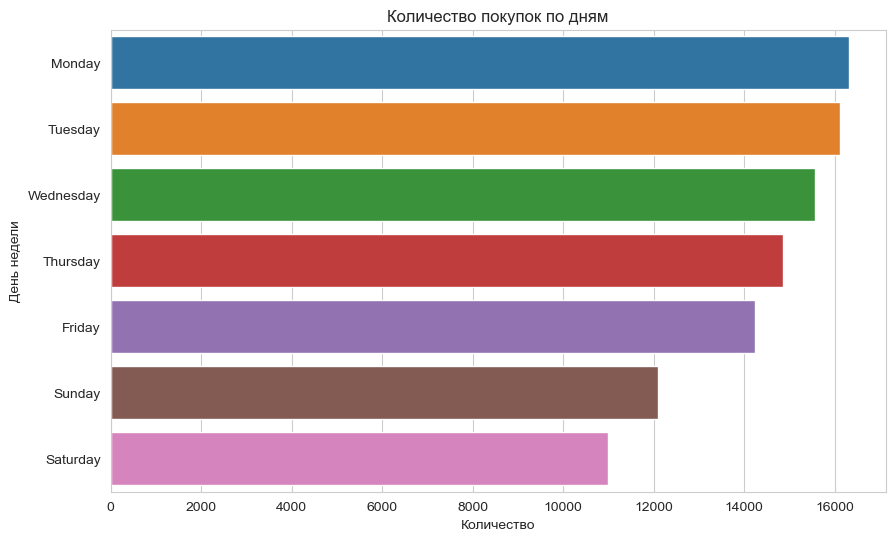

In [206]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

days_frequency_order = items_on_date['purchase_day'].value_counts().index
g = sns.countplot(y = 'purchase_day', data = items_on_date, order =  days_frequency_order)
g.set_title('Количество покупок по дням')
g.set(xlabel = 'Количество', ylabel = 'День недели')

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [285]:
avg_set = orders.merge(customers[['customer_id','customer_unique_id']], on = 'customer_id')

avg_set = avg_set[avg_set['order_status'] == 'delivered'][['customer_unique_id','order_id', 'order_purchase_timestamp']]

avg_set.order_purchase_timestamp = avg_set.order_purchase_timestamp.dt.to_period('M')

avg_set = avg_set.groupby(['customer_unique_id','order_purchase_timestamp'], as_index = False)['order_id'].nunique()\
                .sort_values('order_id',ascending = False)

avg_set['weeks'] = avg_set['order_purchase_timestamp'].dt.daysinmonth/7

avg_set['orders_per_week'] = avg_set['order_id']/avg_set['weeks']

avg_set = avg_set.groupby('customer_unique_id',as_index = False)['orders_per_week'].mean()\
                .sort_values('orders_per_week', ascending = False)

### Среднее количество заказов в неделю:

In [286]:
avg_set.head()

,customer_unique_id,orders_per_week
6964,12f5d6e1cbf93dafd9dcc19095df0b3d,1.354839
59192,a239b8e2fbce33780f1f1912e2ee5275,1.000000
64495,b08fab27d47a1eb6deda07bfd965ad43,0.933333
13790,25a560b9a6006157838aab1bdbd68624,0.933333
48187,83e7958a94bd7f74a9414d8782f87628,0.903226


# 5. Используя pandas, проведи когортный анализ пользователей. 
# В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.


### Сначала найду дату первого заказа каждым клиентом
### Так же буду использовать только заказы delivered

In [321]:
# Добавим колонку с первым заказом (birthtime)

complete_orders['birthtime'] = complete_orders.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

# Берем только месяц из birthtime

complete_orders['birthtime'] = complete_orders.birthtime.dt.to_period('M') 

# Оставляю только нужные для ретеншен колонки

retention = complete_orders[['customer_unique_id', 'order_month', 'birthtime']]

# Считаю разницу между месяцем первой и последующих покупок

retention['diff'] = (retention['order_month'].dt.year - retention['birthtime'].dt.year) * 12 + (retention['order_month'].dt.month - retention['birthtime'].dt.month)

In [322]:
retention.head()

,customer_unique_id,order_month,birthtime,diff
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,1
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11,0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02,0


### Теперь распределим все на когорты и возмьем нужный нам временной промежуток

In [323]:
# Фильтрую данные с января по декабрь 2017

cohort = retention.query('birthtime >= "2017-01" and birthtime <= "2017-12"')

# Сгруппируем по кагортам, посчитаем количество каждого retention_month в когорте

cohort = cohort.groupby('birthtime',as_index = False)['diff'].value_counts()

In [324]:
cohort.head()

,birthtime,diff,count
0,2017-01,0,749
1,2017-01,12,5
2,2017-01,4,3
3,2017-01,6,3
4,2017-01,10,3


In [329]:
retention_cohort = cohort.pivot(index = 'birthtime', columns = 'diff', values = 'count')

retention_cohort

diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
birthtime,,,,,,,,,,,,,,,,,,,
2017-01,749.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1651.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,2541.0,12.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04,2284.0,15.0,6.0,5.0,6.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN
2017-05,3517.0,17.0,16.0,10.0,10.0,12.0,16.0,5.0,9.0,11.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN
2017-06,3092.0,16.0,13.0,13.0,10.0,12.0,11.0,7.0,4.0,6.0,9.0,12.0,5.0,6.0,10.0,NaN,NaN,NaN,NaN
2017-07,3820.0,22.0,13.0,9.0,13.0,8.0,12.0,4.0,8.0,11.0,8.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4133.0,29.0,16.0,11.0,14.0,23.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4070.0,28.0,22.0,15.0,18.0,13.0,9.0,10.0,11.0,7.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
# Привожу значение к процентам, для этого разделяю значение каждого месяца в кагорте на значение первого
# Создаю колонку с  значением первого месяца соответсвующей когорты

cohort['cohort_max'] = cohort.groupby('birthtime')['count'].transform('max')

# Разделю колонку count на значение первого месяца

cohort['retention_rate'] = ((cohort['count']/cohort['cohort_max'])*100).round(2)

# Создам сводную таблицу

retention_cohort_perc = cohort.pivot(index = 'birthtime', columns = 'diff', values = 'retention_rate')

retention_cohort_perc

diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
birthtime,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.27,0.27,0.13,0.40,0.13,0.40,0.13,0.13,NaN,0.40,0.13,0.67,0.40,0.13,0.13,0.27,0.40,0.13
2017-02,100.0,0.18,0.30,0.12,0.42,0.12,0.24,0.18,0.12,0.18,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.18,NaN
2017-03,100.0,0.47,0.35,0.47,0.35,0.16,0.16,0.31,0.31,0.08,0.35,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN
2017-04,100.0,0.66,0.26,0.22,0.26,0.26,0.39,0.31,0.31,0.18,0.26,0.09,0.04,0.04,0.09,0.09,0.18,NaN,NaN
2017-05,100.0,0.48,0.45,0.28,0.28,0.34,0.45,0.14,0.26,0.31,0.26,0.34,0.23,0.03,0.17,0.20,NaN,NaN,NaN
2017-06,100.0,0.52,0.42,0.42,0.32,0.39,0.36,0.23,0.13,0.19,0.29,0.39,0.16,0.19,0.32,NaN,NaN,NaN,NaN
2017-07,100.0,0.58,0.34,0.24,0.34,0.21,0.31,0.10,0.21,0.29,0.21,0.31,0.13,0.24,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.70,0.39,0.27,0.34,0.56,0.29,0.27,0.15,0.15,0.24,0.19,0.12,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.69,0.54,0.37,0.44,0.32,0.22,0.25,0.27,0.17,0.25,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Строю хитмэп

[Text(0.5, 49.7222222222222, 'Месяц'),
 Text(147.72222222222223, 0.5, 'Когорта')]

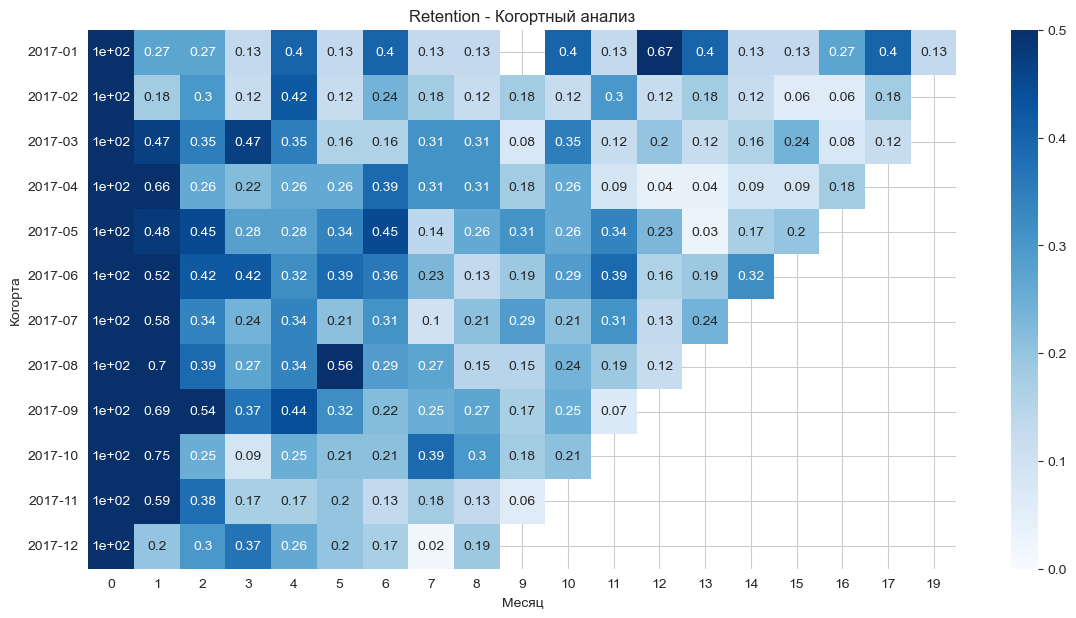

In [331]:
plt.figure(figsize = (14,7))
g =  sns.heatmap(data = retention_cohort_perc, annot = True, vmin = 0.0, vmax = 0.5, cmap = 'Blues')
g.set_title('Retention - Когортный анализ')
g.set(xlabel = 'Месяц', ylabel = 'Когорта')

### Ответ -  Наибольший ретеншн на третий месяц в когорте от 03-2017

# 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию

In [170]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [171]:
items.head(2)

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.9


In [172]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


### Для RFM сегментации нам пригодятся customer_unique_id, даты заказов и суммы покупок

In [346]:
order_customers = orders.merge(customers, on = 'customer_id', how = 'left')

for_rfm = items.merge(order_customers, on = 'order_id', how = 'left')

for_rfm.head(2)

,order_id,product_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.9,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP


In [347]:
# фильтрую по статусу delivered, беру только нужные нам колонки

for_rfm = for_rfm.query('order_status == "delivered"')[['customer_unique_id','order_id','order_purchase_timestamp','price']]

# Так как все покупки в заказе разбиты по строкам, а нам нужна сумма заказа, нужно посчитать сумму по order_id.

for_rfm['TotalSum'] = for_rfm.groupby('order_id')['price'].transform('sum')

for_rfm = for_rfm.drop_duplicates('order_id').drop(columns = ['price'])

# Также нам не нужно время заказа, только дата

for_rfm['order_purchase_timestamp'] = for_rfm['order_purchase_timestamp'].dt.date

for_rfm

,customer_unique_id,order_id,order_purchase_timestamp,TotalSum
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,58.90
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2017-04-26,239.90
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,2018-01-14,199.00
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,2018-08-08,12.99
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04,199.90
...,...,...,...,...
112645,0c9aeda10a71f369396d0c04dce13a64,fffc94f6ce00a00581880bf54a75a037,2018-04-23,299.99
112646,0da9fe112eae0c74d3ba1fe16de0988b,fffcd46ef2263f404302a634eb57f7eb,2018-07-14,350.00
112647,cd79b407828f02fdbba457111c38e4c4,fffce4705a9662cd70adb13d4a31832d,2017-10-23,99.90
112648,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,2017-08-14,55.99


### Выполнил предподготовку данных, теперь можно начинать сегментацию

In [348]:
# Создаю snapshot date - дату предполагаемой выгрузки датасэта и проведения сегментации, для корректного определения 
# кретерия recency 

snapshot_date = max(for_rfm.order_purchase_timestamp) + dt.timedelta(days=1)

snapshot_date

datetime.date(2018, 8, 30)

In [376]:
rfm_df = for_rfm.groupby('customer_unique_id',as_index = False)\
                    .agg({'order_purchase_timestamp' : lambda x: (snapshot_date - x.max()).days,\
                         'order_id':'count',\
                         'TotalSum':'sum'})

rfm_df.rename(columns = {'customer_unique_id':'customer_id',\
                        'order_purchase_timestamp':'Recency',\
                        'order_id':'Frequency',\
                        'TotalSum':'MoneteryValue'}, inplace = True)

rfm_df.head()

,customer_id,Recency,Frequency,MoneteryValue
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00


In [354]:
rfm_df.describe([0.05, 0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Recency,93358.0,238.478877,152.595054,1.00,24.0,115.00,219.00,347.0000,520.000,714.0
Frequency,93358.0,1.033420,0.209097,1.00,1.0,1.00,1.00,1.0000,1.000,15.0
MoneteryValue,93358.0,141.621480,215.694014,0.85,19.8,47.65,89.73,154.7375,419.809,13440.0


In [196]:
rfm_df['Frequency'].value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: Frequency, dtype: int64

### Проведем сегментацию: сегменты по Recency и MoneteryValue определяем по квантилям, Frequency, так как большинство пользователей совершило 
### только одну покупку, разделим вручную. Чем больше покупок тем выше ранг.

In [382]:
r_labels = list(range(4,0,-1))
f_labels = list(range(1,5))
m_labels = list(range(1,5))

rfm_df['R'] = pd.qcut(rfm_df['Recency'], q = 4, labels = r_labels)
rfm_df['F'] = pd.cut(rfm_df['Frequency'], [0, 1, 2, 5,16 ], labels = f_labels)
rfm_df['M'] = pd.qcut(rfm_df['MoneteryValue'], q = 4, labels = m_labels)

def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])

rfm_df['RFM_segment'] = rfm_df.apply(join_rfm, axis = 1)

In [383]:
rfm_df.sort_values(['RFM_segment'],ascending = False).head()

,customer_id,Recency,Frequency,MoneteryValue,R,F,M,RFM_segment
36500,63cfc61cee11cbe306bff5857d00bfe4,94,6,579.81,4,4,4,444
80538,dc813062e0fc23409cd255f7f53c7074,7,6,687.76,4,4,4,444
51431,8d50f5eadf50201ccdcedfb9e2ac8455,10,15,714.63,4,4,4,444
73921,ca77025e7201e3b30c44b472ff346268,90,7,806.61,4,4,4,444
36706,6469f99c1f9dfae7733b25662e7f1782,63,7,664.20,4,4,4,444


In [384]:
# Recency
recency_segment_borders = rfm_df.groupby('R', as_index=False)\
                             .agg({'Recency': ['min', 'max']})\
                             .rename(columns={'R': 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
recency_segment_borders

RFM_segment Recency        
               lowest highest
0           4       1     115
1           3     116     219
2           2     220     347
3           1     348     714

In [387]:
# Frequency
frequency_segment_borders = rfm_df.groupby('F', as_index=False)\
                             .agg({'Frequency': ['min', 'max']})\
                             .rename(columns={'F': 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
frequency_segment_borders

RFM_segment Frequency        
                 lowest highest
0           1         1       1
1           2         2       2
2           3         3       5
3           4         6      15

In [388]:
# MoneteryValue
MoneteryValue_segment_borders = rfm_df.groupby('M', as_index=False)\
                             .agg({'MoneteryValue': ['min', 'max']})\
                             .rename(columns={'M': 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
MoneteryValue_segment_borders

RFM_segment MoneteryValue          
                     lowest   highest
0           1          0.85     47.65
1           2         47.70     89.70
2           3         89.76    154.70
3           4        154.75  13440.00

In [406]:
# Функция, определяющая сегмент в зав-ти от RFM-Score

def assign_segment(x):
    if x in ['444', '443']:
        return 'VIP'
    elif x in ['433', '432', '434', '432', '431']:
        return 'loyal_client'
    elif x in ['421', '423', '424', '423', '422','321', '323', '324', '323', '322']:
        return 'potential_loyalists'
    elif x in ['411', '311','211']:
        return 'new_client'
    elif x in ['111']:
        return 'churn'
    else:
        return 'regular_client'

In [407]:
rfm_df['Segment'] = rfm_df['RFM_segment'].apply(assign_segment)

In [408]:
rfm_df.Segment.value_counts()

regular_client         68641
new_client             17293
churn                   5947
potential_loyalists     1401
loyal_client              71
VIP                        5
Name: Segment, dtype: int64

### Распределение показателей внутри сегментов:

In [409]:
rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MoneteryValue': 'mean'
})

,Recency,Frequency,MoneteryValue
Segment,,,
VIP,52.800000,8.200000,690.602000
churn,455.415840,1.000000,28.927718
loyal_client,57.901408,3.281690,516.050000
new_client,166.281270,1.000000,29.124105
potential_loyalists,113.820128,2.000000,245.073362
regular_client,240.617328,1.022159,177.188291
